In [39]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
import sys
import concurrent
sys.path.append('..')
from _vars import *

In [28]:
[*sp.audio_features(sids[0])[0]]
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
attrs = [
 'danceability',
 'energy',
 #'key',
 'loudness',
 #'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 #'type',
 #'id',
 #'uri',
 #'track_href',
 #'analysis_url',
 'duration_ms',
 #'time_signature'
]

def red(data):
    for i in [*data]:
        if i not in attrs:
            del data[i]
    return data

def getAudioAttributes(pid='saved'):
    if pid=='saved':
        tracks = sids
    else:
        tracks = get_track_ids(pid)
        
    tids_lst = []
    for k in range(len(tracks)//50):
        tids_lst.append(tracks[50*k: 50*(k+1)])
    data = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
        future_to_tids = {executor.submit(sp.audio_features, tids): tids for tids in tids_lst}
        for future in concurrent.futures.as_completed(future_to_tids):
            tids = future_to_tids[future]
            res = future.result()
            data.extend([red(t) for t in res]) #memo cache
    return data        
    
# load dataset
#pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
df = pd.DataFrame(getAudioAttributes()) #rgab from database
#our_data = our_data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.554,0.764,-7.534,0.0280,0.0913,0.070400,0.149,0.6740,110.244,210453
1,0.252,0.278,-11.345,0.0320,0.6960,0.013900,0.110,0.1160,75.703,157173
2,0.846,0.540,-9.748,0.1810,0.1960,0.317000,0.107,0.8080,32.992,113684
3,0.221,0.178,-12.995,0.0399,0.9560,0.000671,0.348,0.0732,175.617,215667
4,0.667,0.534,-8.816,0.0366,0.2950,0.000325,0.291,0.6270,167.922,186827


In [40]:
#feature selection
features = [
 'danceability',
 #'energy',
 #'loudness',
 'speechiness',
 #'acousticness',
 #'instrumentalness',
 #'liveness',
 #'valence',
 'tempo',
 'duration_ms',
]

genres = [
    'edm',
    'latin',
    'pop',
    'r&b',
    'rap',
    'rock'
]
X = df[features]
y = df.tempo.astype(int) #df.label
y

0      110
1       75
2       32
3      175
4      167
      ... 
145    143
146     95
147    125
148    143
149    177
Name: tempo, Length: 150, dtype: int32

In [61]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

df.columns[:-1]

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

Accuracy: 0.4666666666666667
Testing Accuracy :  0.4666666666666667


IndexError: list index out of range

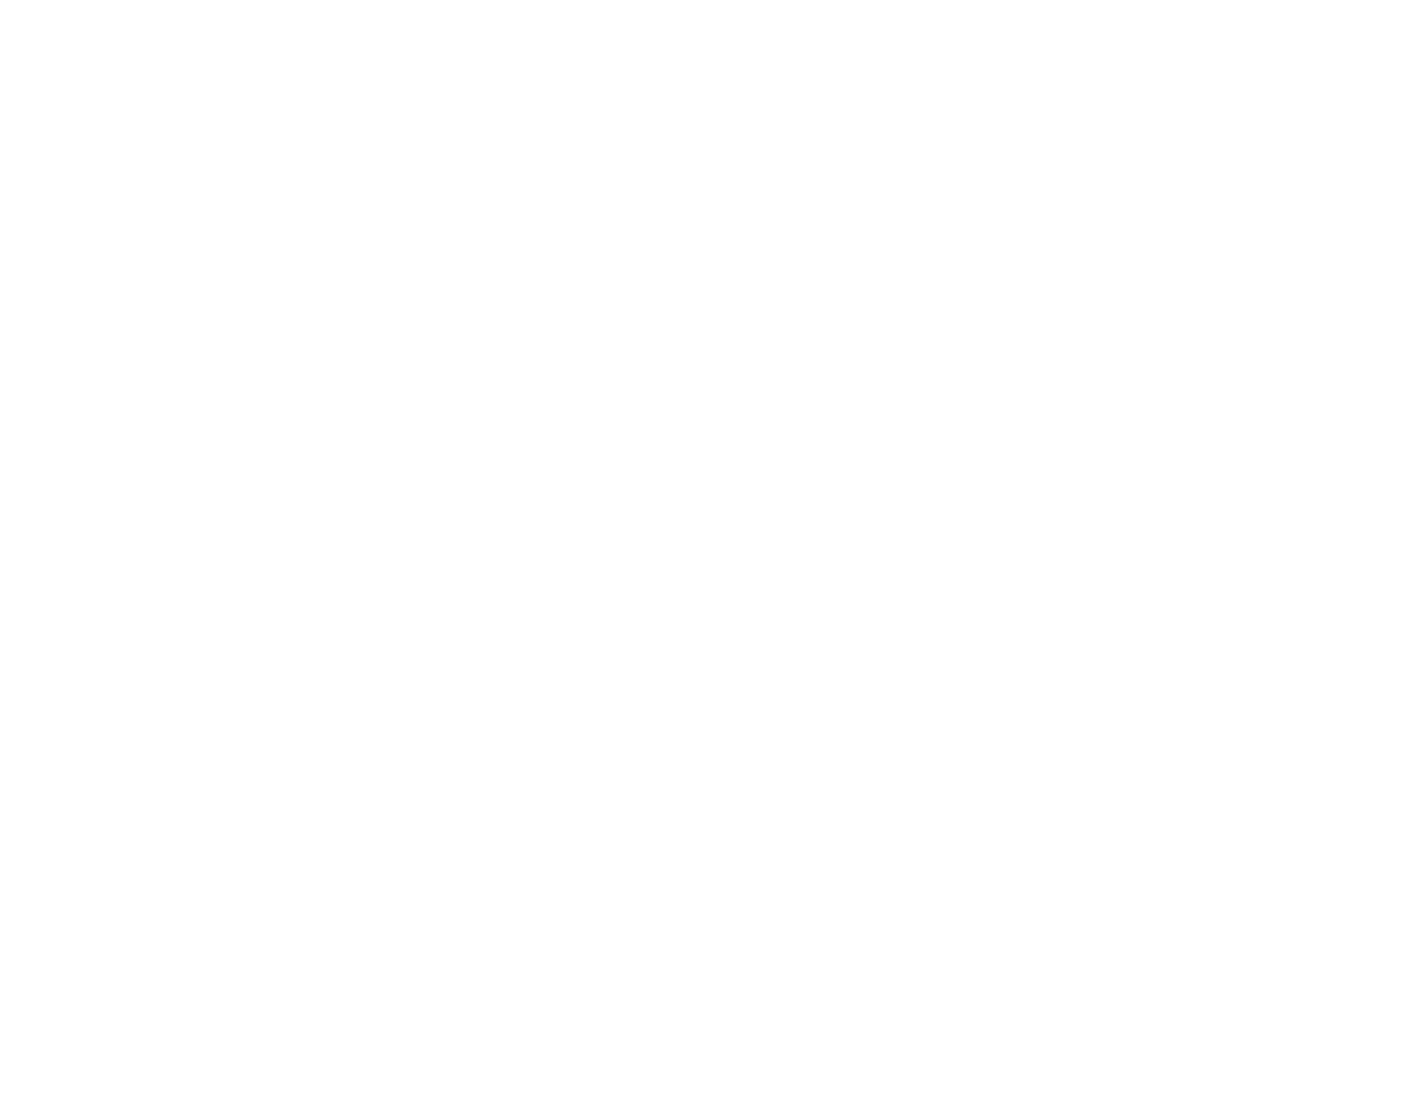

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#https://www.section.io/engineering-education/decision-tree-in-python/
print("Testing Accuracy : " , clf.score(X_test , y_test))
y_pred = clf.predict(X_test)

#visualize
#plot decision tree
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   max_depth=3,
                   feature_names=df.columns[:-1],  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
from sklearn import tree

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
data = tree.export_graphviz(clf, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [47]:
# visualizeing
#!pip install graphviz
#!pip install pydotplus
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from io import StringIO
from IPython.display import Image  
#import pydotplus

In [45]:
#optimization
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.17777777777777778


In [51]:
import pydotplus
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names = features,
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())

IndexError: list index out of range